<a href="https://colab.research.google.com/github/Jasmine-kaur8/Baseball_Project/blob/main/Baseball_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving baseball(project-1).csv to baseball(project-1).csv


Importing the data

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

Importing the libraries

In [ ]:
data = pd.read_csv('baseball(project-1).csv')
data.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Reading the data

In [ ]:
data.shape

(30, 17)

The data has 31 rows and 17 columns

In [ ]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


E has outliers. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All numbers are numerical

In [ ]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values

In [ ]:
data['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

These are the value counts of wins

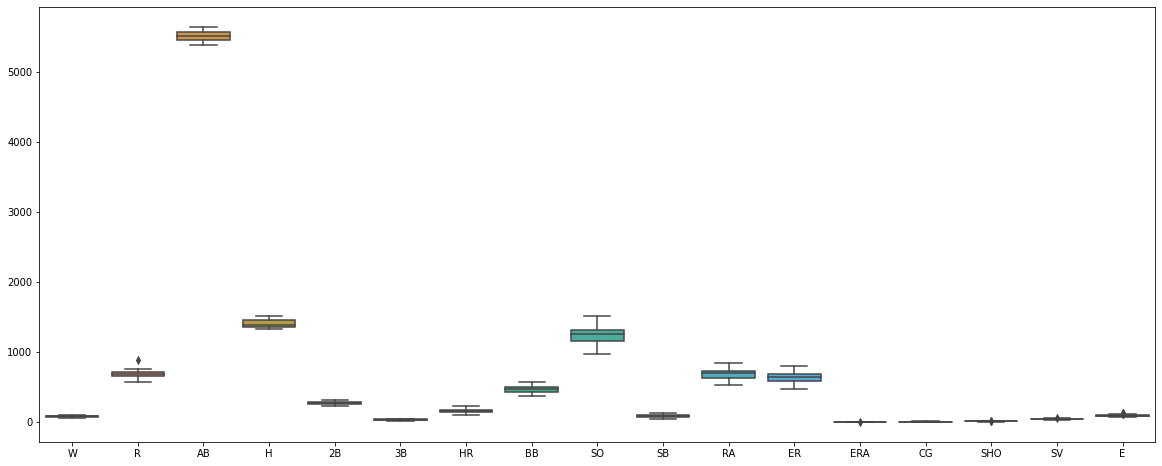

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (20,8))
sns.boxplot(data = data, ax =ax)
plt.show()

There are outliers in some of the features

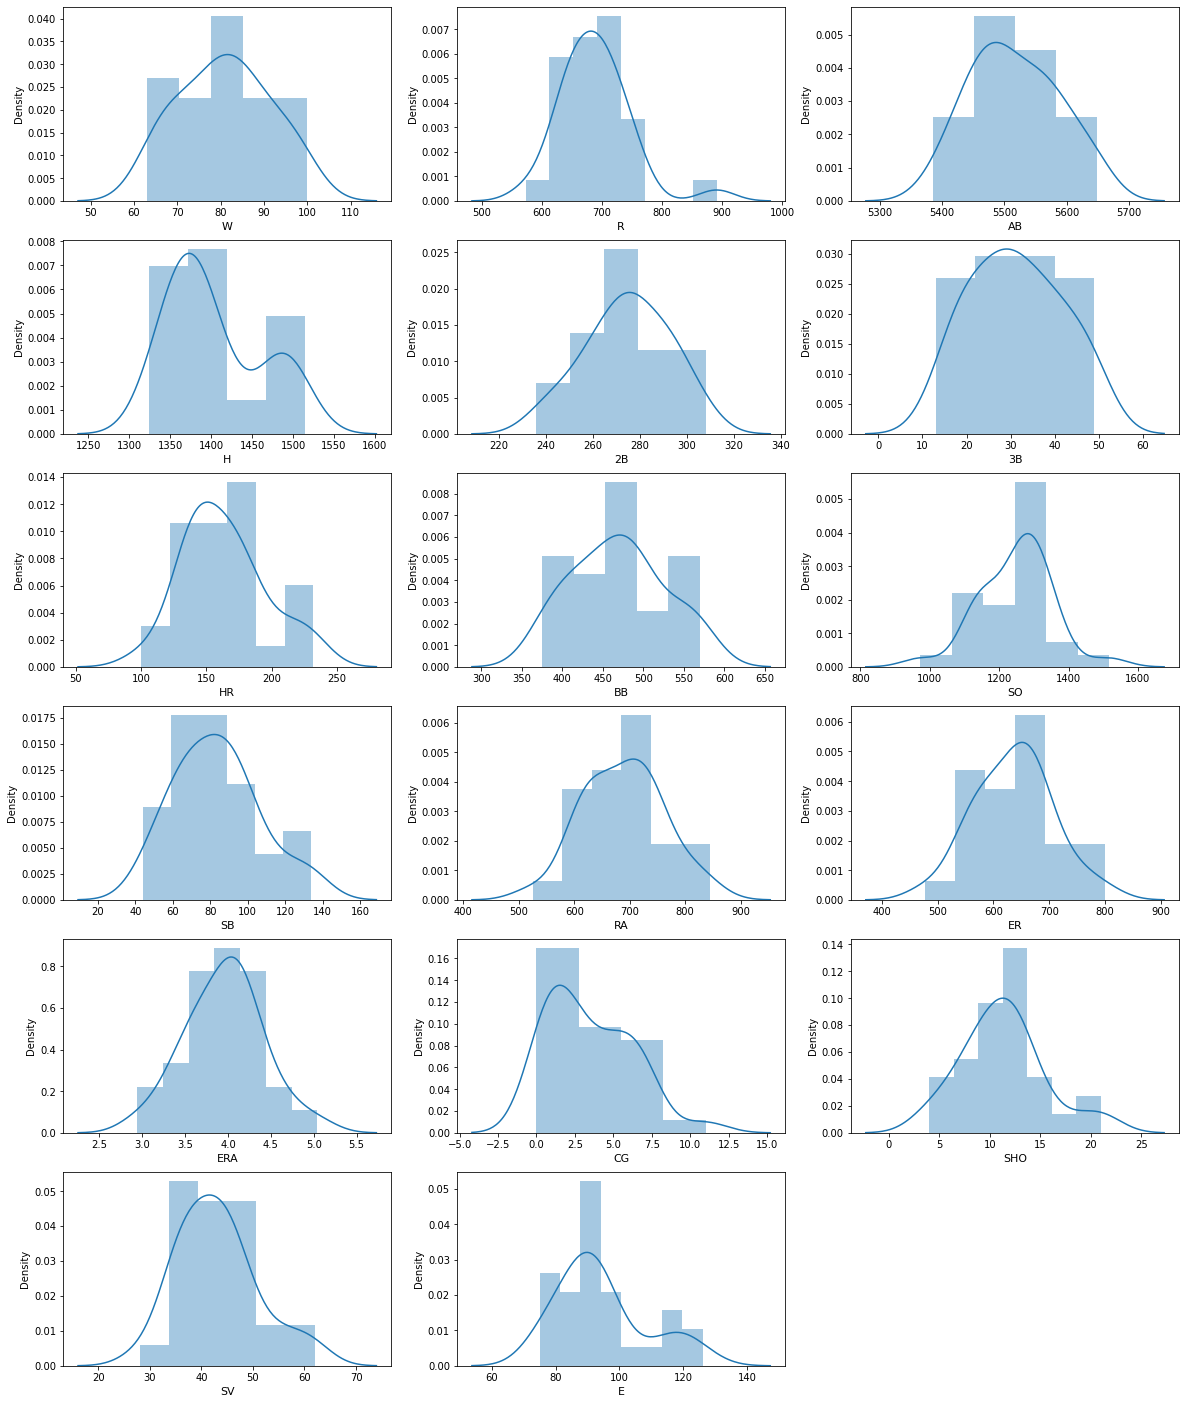

In [ ]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=18:
    ax = plt.subplot(6,3,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 11)
  graph+=1
plt.show()

Some features have skewed data

In [ ]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Very few features have skewness outside (-.5,.5)

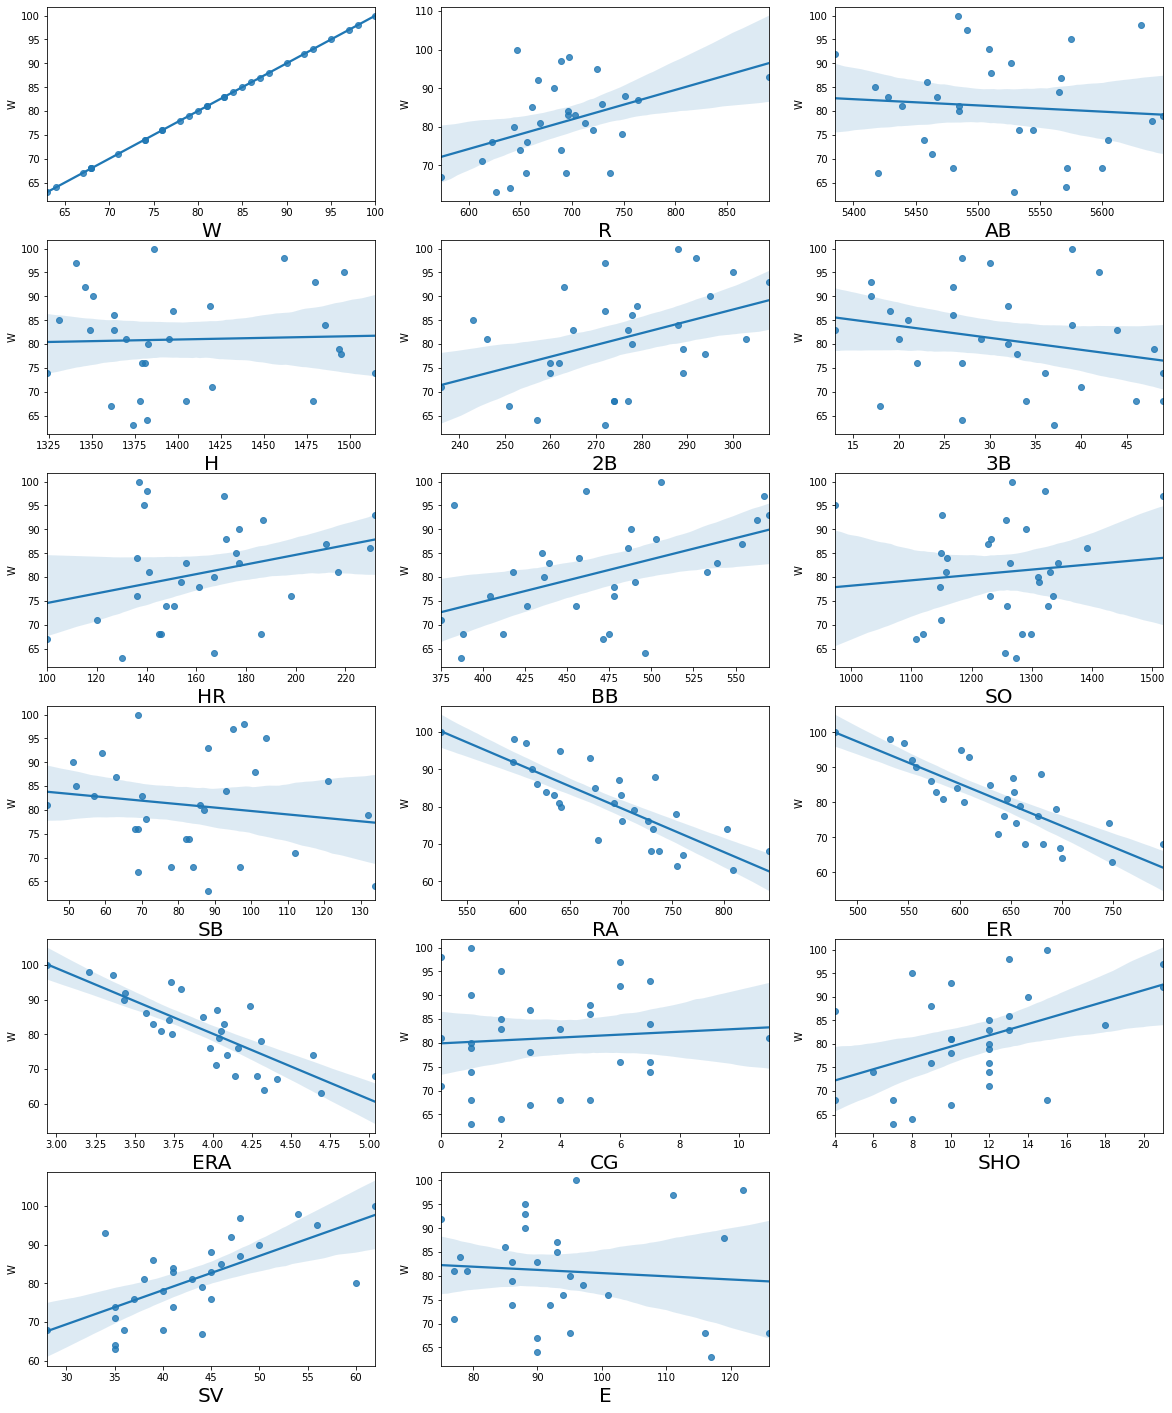

In [ ]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=18:
    ax = plt.subplot(6,3,graph)
    sns.regplot(x = data[column], y = 'W', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

There are some features that do not show any relation with the target variable, it is better to drop those features.

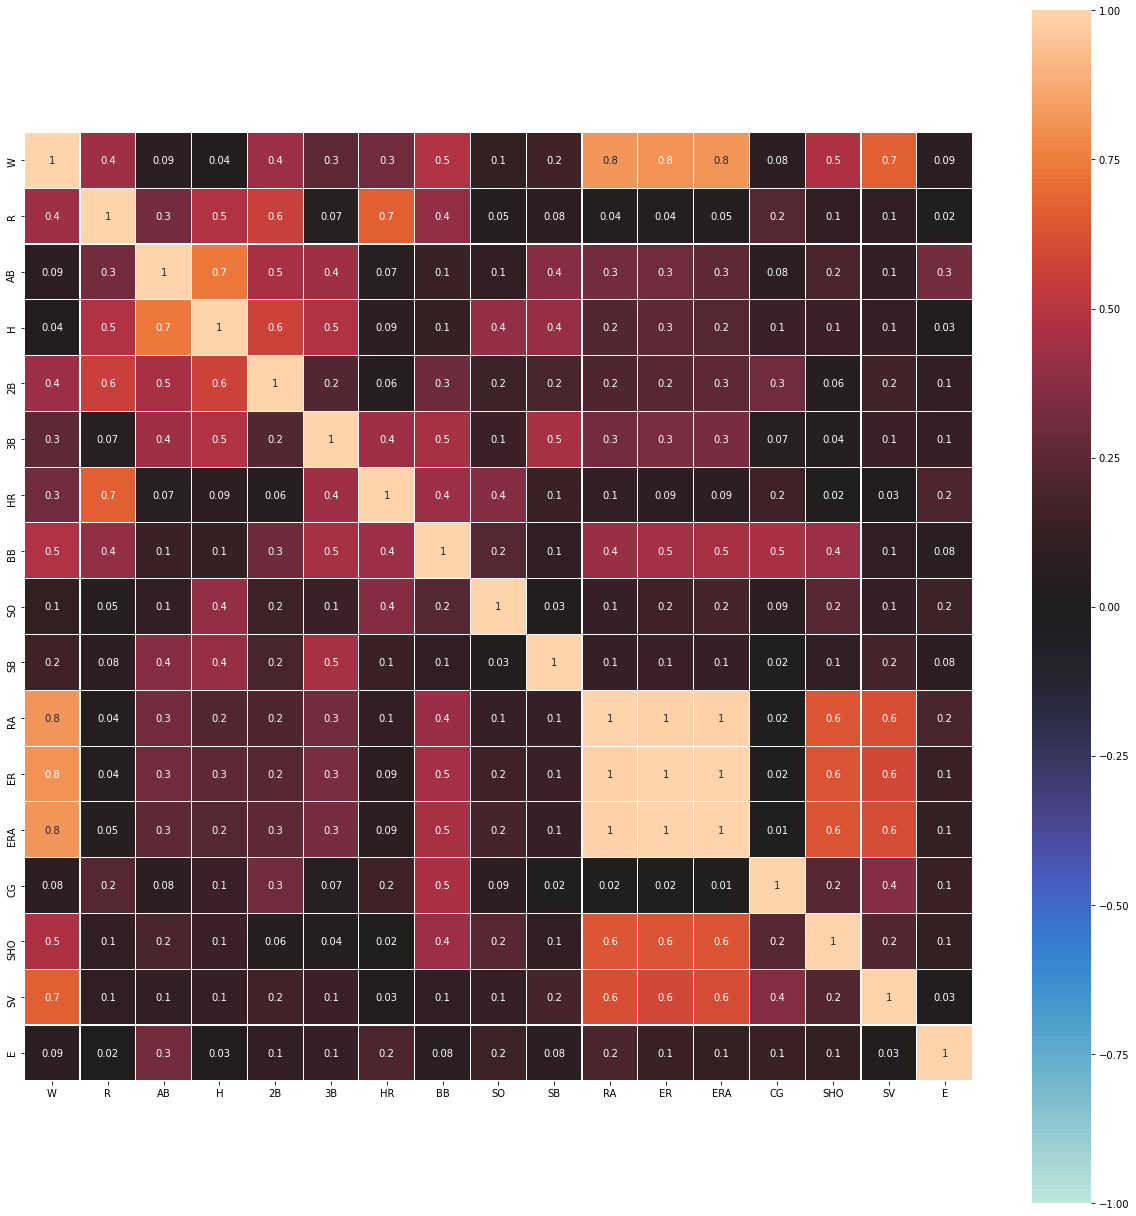

In [ ]:
data_corr = data.corr().abs()
plt.figure(figsize = (17,17))
sns.heatmap(data_corr, vmin = -1, vmax = 1, annot = True, square = True, center = 0, fmt = '.1g', linewidth = .1,)
plt.tight_layout()

The heatmap shows that ER, ERA and RA are perfectly correlated (pairwise). This leads to the problem of multicollinearity

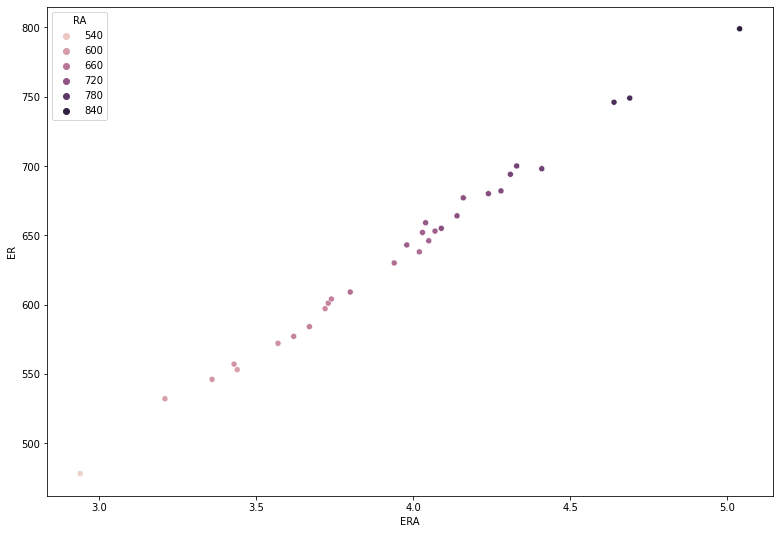

In [ ]:
fig,axes = plt.subplots(1,1, figsize = (13,9))
sns.scatterplot(x = 'ERA', y ='ER', hue = 'RA' , data = data)

The correlation between ER, RA and ERA are verified using the scatterplot.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

Applied standard scaler

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['FEATURES'] = data.columns
vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif

,FEATURES,VIF
0,W,19.891017
1,R,23.249385
2,AB,13.665681
3,H,10.070734
4,2B,4.883096
5,3B,3.304753
6,HR,10.967594
7,BB,4.269219
8,SO,2.661169
9,SB,2.123260


ERA, ER have very high VIF, it is better to drop one of the features, otherwise it will lead to the problem of multicollinearity

In [ ]:
data1 = data.drop(columns = ['H','CG','E','AB','SB'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data1)

Applied standard scaler after droping the features

In [ ]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['FEATURES'] = data1.columns
vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif

,FEATURES,VIF
0,W,12.311880
1,R,9.851304
2,2B,2.926386
3,3B,2.832220
4,HR,6.448098
5,BB,2.636994
6,SO,2.396660
7,RA,127.850776
8,ER,456.405503
9,ERA,268.683343


The VIF has been reduced significantly.

In [ ]:
#Treating the outliers

#finding the quantile

Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

#REMOVING OUTLIERS USING IQR:

data2 = data1[~((data1 < Q1 - 1.5*IQR)) | (data1 > (Q3 + 1.5*IQR)).any(axis=1)]

print("SHAPE BEFORE AND AFTER")
print("SHAPE BEFORE".ljust(20), ":", data1.shape)
print("SHAPE AFTER".ljust(20), ":", data2.shape)
print("PERCENTAGE LOSS".ljust(20),":", (data1.shape[0] - data2.shape[0])/data1.shape[0])

SHAPE BEFORE AND AFTER
SHAPE BEFORE         : (30, 12)
SHAPE AFTER          : (30, 12)
PERCENTAGE LOSS      : 0.0


There is no change after applying IQR

In [ ]:
#Applying z score
from scipy.stats import zscore

z = np.abs(zscore(data1))

data3 = data1[(z<3).all(axis = 1)]


Appling z score to the data

In [ ]:
print("shape before and after")
print('shape before'.ljust(20),":", data1.shape)
print("shape after".ljust(20), ":", data3.shape)
print("percentage loss".ljust(20),":", (data1.shape[0]-data3.shape[0])/data1.shape[0])

shape before and after
shape before         : (30, 12)
shape after          : (29, 12)
percentage loss      : 0.03333333333333333


3.33% data is lossed. This acceptable.

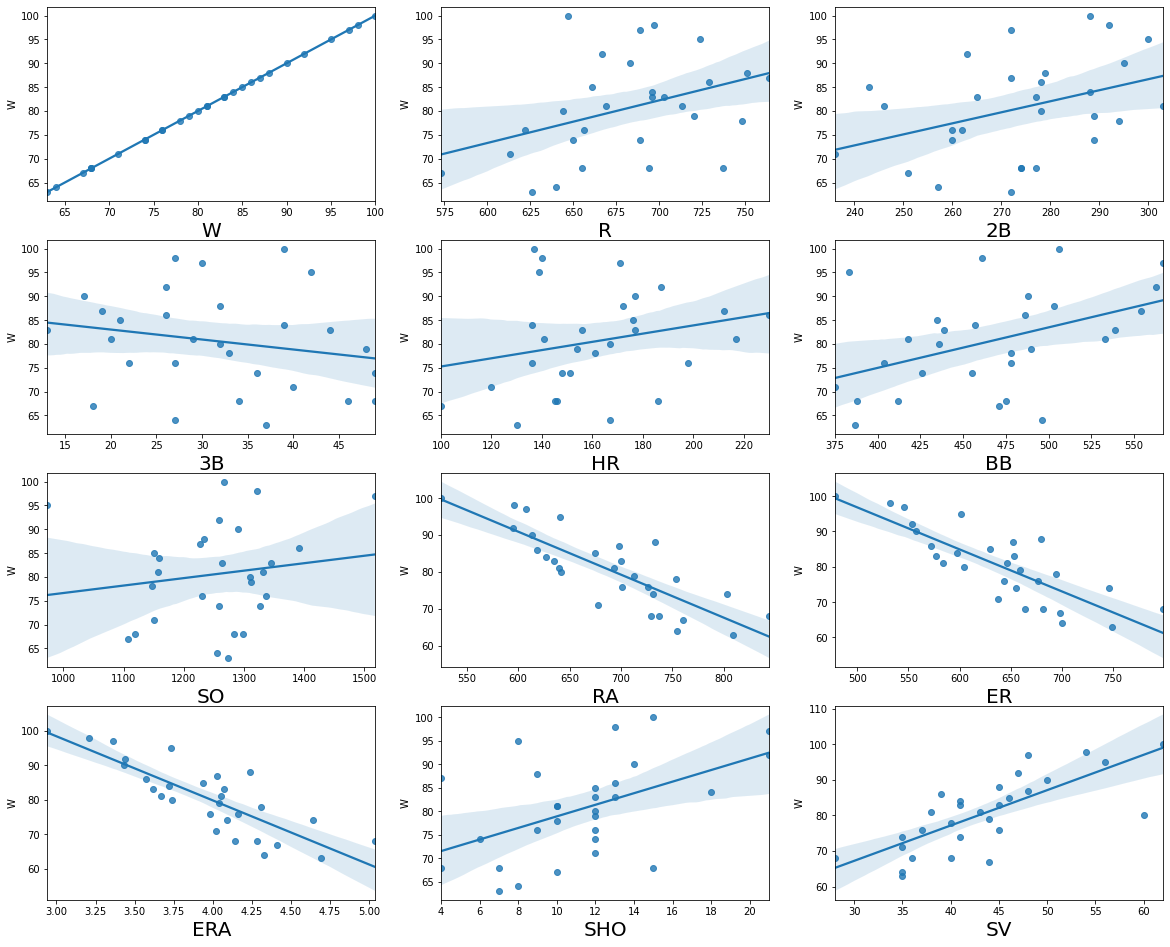

In [ ]:
plt.figure(figsize = (20,25))
graph = 1

for column in data3:
  if graph<=18:
    ax = plt.subplot(6,3,graph)
    sns.regplot(x = data3[column], y = 'W', data = data3)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Linear regression after droping the features

In [ ]:
data3.skew()

W      0.119013
R     -0.215364
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
dtype: float64

The skewness of the data in under control

In [ ]:
y = data3['W']
x = data3.drop(['W'],axis = 1)

Spliting the data between the dependent and the independent variable


In [ ]:
#Model Building

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 8)

models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(n_neighbors = 5), GradientBoostingRegressor()]

model_names = ['LR', 'RF', 'KNN', 'GB']

r2 = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    r2.append(r2_score(y_test,pred))

models = {'Modelling Algoritm' : model_names, 'r2 score' : r2}

models_df = pd.DataFrame(models)
models_df

,Modelling Algoritm,r2 score
0,LR,0.807408
1,RF,0.620193
2,KNN,0.442009
3,GB,0.600206


Trained the model and received r2 score

In [ ]:
#Cross Validation

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 8)

models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(n_neighbors = 5), GradientBoostingRegressor()]

model_names = ['LR', 'RF', 'KNN', 'GB']

k_f = KFold(n_splits=4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    CV_S.append(cross_val_score(c, x, y, cv = 5).mean())

CV = {'MODELLING ALGORITHM': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,MODELLING ALGORITHM,CV SCORE
0,LR,0.297430
1,RF,-0.505067
2,KNN,-0.219104
3,GB,-1.171960


Applied cross validation

In [ ]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.807408,0.297430,0.509979
1,RF,0.620193,-0.505067,1.125260
2,KNN,0.442009,-0.219104,0.661113
3,GB,0.600206,-1.171960,1.772166


The linear regressor gives the least difference between the r2 score and the CV score.

In [ ]:
#HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

grid_param = {
    'fit_intercept' : ['True', 'False'],
    'normalize' : ['True', 'False'],
    'copy_X' : ['True', 'False'],
    'n_jobs' : range(1,5)
}


Applied hyperparameter tuning

In [ ]:
grid = GridSearchCV(LinearRegression(), param_grid = grid_param)

Applied GridSearchCV

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': range(1, 5),
                         'normalize': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Trained the model

In [ ]:
best_parameters = grid.best_params_
print(best_parameters)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'normalize': 'True'}


Got the best parameters

In [ ]:
#FINAL MODEL
#Substituting the best parameters in the LinearRegression:

lr =  LinearRegression(copy_X = 'True', fit_intercept = True, n_jobs = 1, normalize = 'True')

lr.fit(x_train, y_train)
pred = lr.predict(x_test)
rscore = r2_score(y_test, pred)
rscore

0.7988079550376831

The r2 score increased to 79% after hyperparameter tuning

In [ ]:
#SAVING THE MODEL:

import joblib
joblib.dump(lr, 'Baseball_final_model.pkl')

['Baseball_final_model.pkl']

Saved the model